# Tensorboard: 可视化学习  
Tensorboard通过读取tensorflow的事件文件来运行。tensorflow的事件文件包括了你会在tensorflow运行中涉及到的主要数据。下面是tensorboard中汇总数据（Summary data）的大体生命周期。  

首先，创建汇总数据的tensorflow图，然后再选择在哪个节点进行汇总（summary）操作。

In [2]:
#以下代码无法运行，仅用来进行参考
import tensorflow as tf
import tensorboard as tf_board

C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hdc\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_x = np.linspace(-5, 3, 10)
train_y = train_x*5 + 10 + np.random.randn(10)*1e-3

In [6]:
print('train_x: ',  train_x)
print('train_y: ',  train_y)

train_x:  [-5.         -4.11111111 -3.22222222 -2.33333333 -1.44444444 -0.55555556
  0.33333333  1.22222222  2.11111111  3.        ]
train_y:  [-15.00181095 -10.55527304  -6.11136725  -1.6664717    2.7770727
   7.22166522  11.66520092  16.11077087  20.55651415  24.99971722]


In [7]:
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

In [8]:
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [9]:
z = tf.multiply(X, w) + b

In [10]:
tf.summary.histogram('z', z)

<tf.Tensor 'z:0' shape=() dtype=string>

In [11]:
criterion = tf.reduce_mean(tf.square(Y-z))
tf.summary.scalar('loss', criterion)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [12]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(criterion)

In [13]:
init = tf.global_variables_initializer()

In [14]:
train_epoches = 20
display_step = 2

finished
W:  [4.971847] b:  [9.709508] loss:  0.20071934


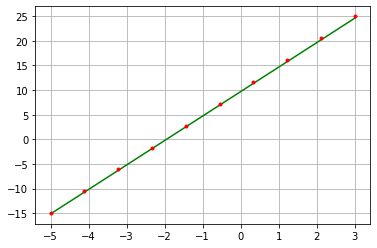

In [16]:
with tf.Session() as sess:
    sess.run(init)
    loss_list = []
    
    merged_summary_op = tf.summary.merge_all() #合并所有的summary
    summary_writer = tf.summary.FileWriter('log/linear_regression', sess.graph)
    
    for epoch in range(train_epoches):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
        if epoch % display_step == 0:
            loss = sess.run(criterion, feed_dict={X:x, Y:y})
            loss_list.append(loss)
        summary_str = sess.run(merged_summary_op, feed_dict={X: train_x, Y: train_y})
        summary_writer.add_summary(summary_str, epoch)
        
    w_, b_ = sess.run([w, b], feed_dict={X: x, Y: y})
    print('finished')
    print('W: ', w_, 'b: ', b_, 'loss: ', loss)
    plt.plot(train_x, train_x*w_+b_, 'g-', train_x, train_y, 'r.')
    plt.grid(True)
    plt.show()